# Real Estate Regression Analysis

Please fill out:
* Student name: Melody Bass
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [473]:
# Data Import
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [474]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [476]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning

In [477]:
# Columns to be dropped
dropped_columns = ['id', 'date', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'yr_built', 'lat', 'long']

In [478]:
df = df.drop(dropped_columns, axis=1)

In [479]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [480]:
#Keep houses 100,000 - 800,000
#df = df.loc[(df['price'] >= 100000) & (df['price'] <= 800000)]
#df.head()

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   sqft_lot      21597 non-null  int64  
 5   floors        21597 non-null  float64
 6   waterfront    19221 non-null  object 
 7   view          21534 non-null  object 
 8   condition     21597 non-null  object 
 9   grade         21597 non-null  object 
 10  sqft_above    21597 non-null  int64  
 11  yr_renovated  17755 non-null  float64
 12  zipcode       21597 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 2.1+ MB


In [482]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [483]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
df['sqft_basement'].astype('int')

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int64

In [484]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [485]:
df['has_basement'] = df['sqft_basement'] > 0
df['has_basement'] = df['has_basement'].astype(int)

In [486]:
df['has_basement'].value_counts()

0    13110
1     8487
Name: has_basement, dtype: int64

In [487]:
df = df.drop('sqft_basement', axis=1)

In [488]:
# 30 years as cutoff for renovation
df['renovated'] = (df['yr_renovated'] > 1985).astype(int)

In [489]:
df.renovated.value_counts()

0    21016
1      581
Name: renovated, dtype: int64

In [490]:
df = df.drop('yr_renovated', axis=1)

In [491]:
df.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2376
view              63
condition          0
grade              0
sqft_above         0
zipcode            0
has_basement       0
renovated          0
dtype: int64

In [492]:
df = df.fillna(0)

In [493]:
df.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
sqft_above      0
zipcode         0
has_basement    0
renovated       0
dtype: int64

In [494]:
df.loc[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,has_basement,renovated
15856,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,98103,1,0


In [495]:
df = df.loc[(df['bedrooms'] <= 32)]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,has_basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,98178,0,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,98125,1,1
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,98028,0,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,98136,1,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,98074,0,0


In [496]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

In [497]:
df['waterfront'] = df['waterfront'].replace(('YES', 'NO'), (1, 0))
df['view'] = df['view'].replace(('NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT')
                                , (0, 1, 2, 3, 4))
df['condition'] = df['condition'].replace(('Poor', 'Fair', 'Average', 'Good', 'Very Good')
                                , (0, 1, 2, 3, 4))
df['grade'] = df['grade'].replace(('3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'
                                   , '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion')
                                , (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21596 non-null  float64
 1   bedrooms      21596 non-null  int64  
 2   bathrooms     21596 non-null  float64
 3   sqft_living   21596 non-null  int64  
 4   sqft_lot      21596 non-null  int64  
 5   floors        21596 non-null  float64
 6   waterfront    21596 non-null  int64  
 7   view          21596 non-null  int64  
 8   condition     21596 non-null  int64  
 9   grade         21596 non-null  int64  
 10  sqft_above    21596 non-null  int64  
 11  zipcode       21596 non-null  int64  
 12  has_basement  21596 non-null  int64  
 13  renovated     21596 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.5 MB


In [499]:
df.grade.value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [500]:
df.waterfront.value_counts()

0    21450
1      146
Name: waterfront, dtype: int64

In [501]:
df.view.value_counts()

0    19484
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [502]:
df.condition.value_counts()

2    14020
3     5677
4     1700
1      170
0       29
Name: condition, dtype: int64

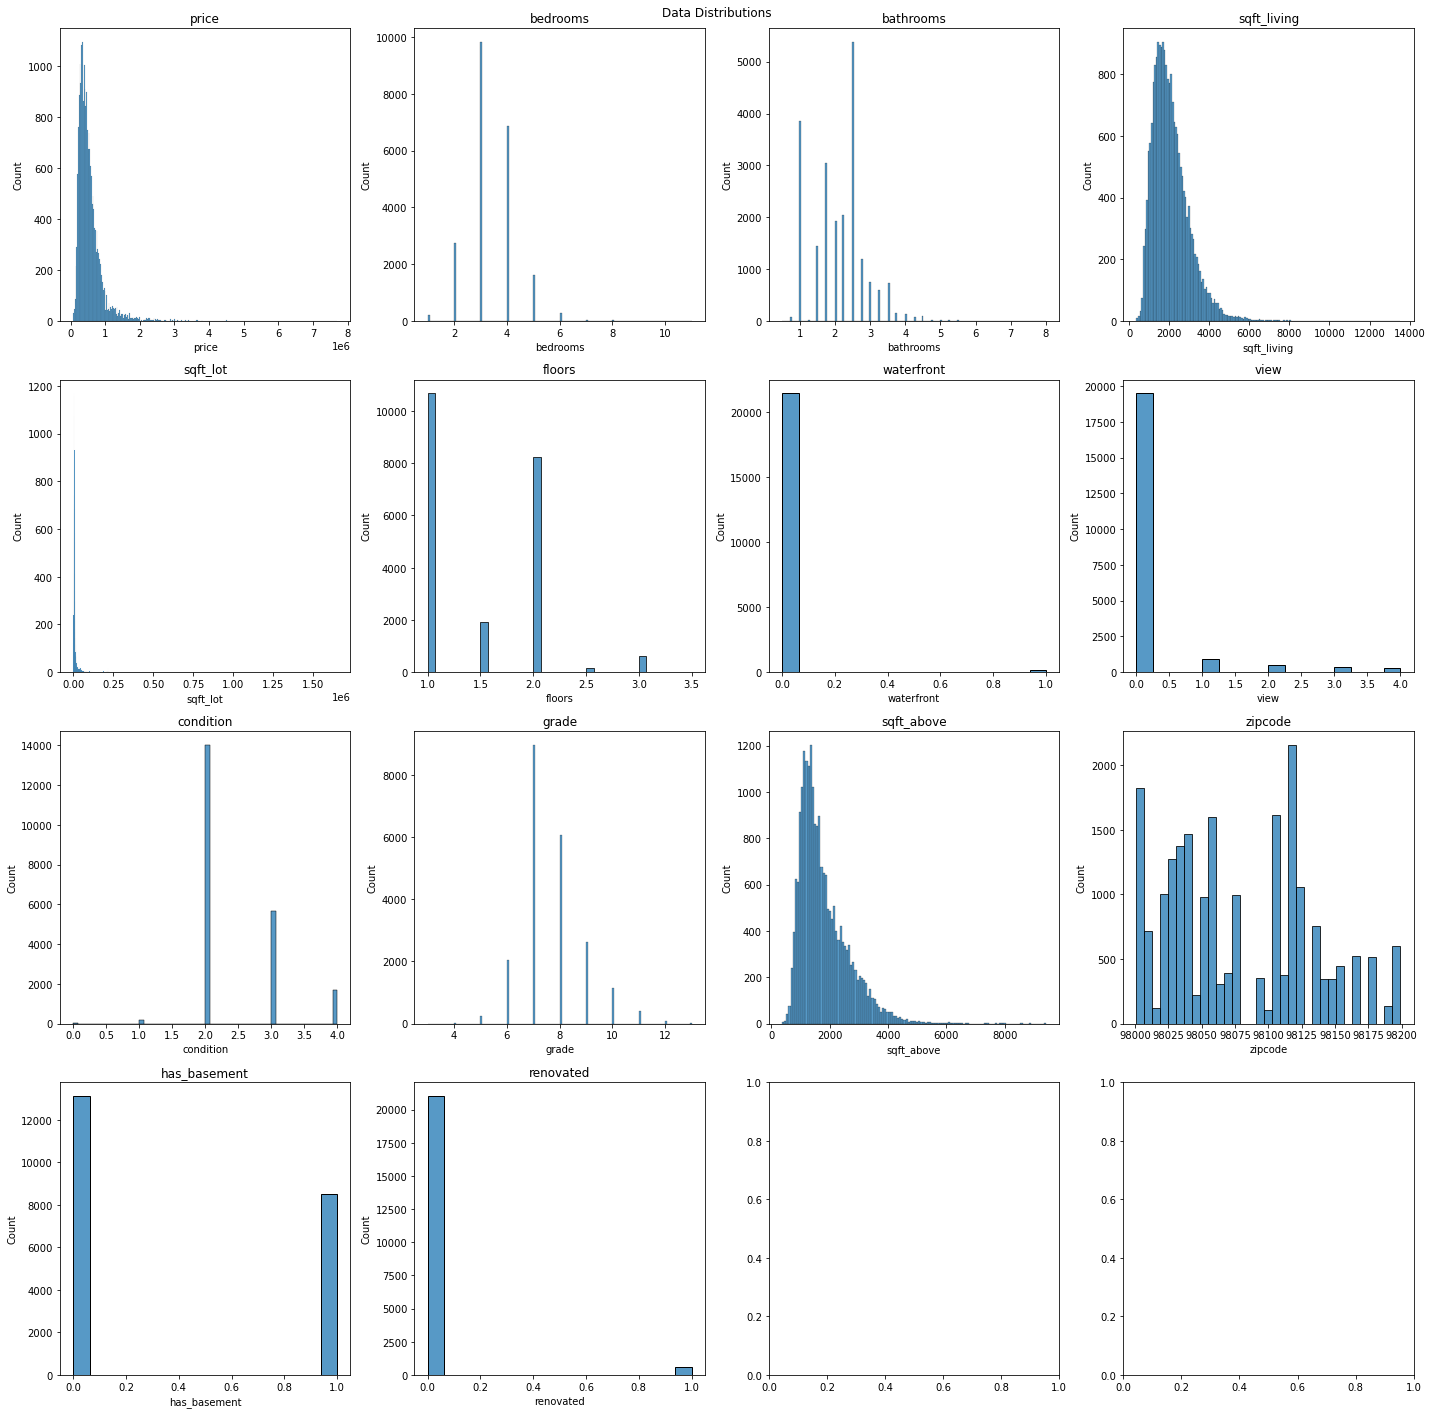

In [503]:
# Looking at the distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    sns.histplot(df[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

In [504]:
# convert to category type
categorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade', 'zipcode', 'renovated','has_basement']
cont = ['sqft_living', 'sqft_lot', 'sqft_above']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category')   

In [505]:
df = pd.get_dummies(df, drop_first=True)

subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

df.head()

,price,sqft_living,sqft_lot,sqft_above,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,221900.0,1180,5650,1180,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,2570,7242,2170,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,770,10000,770,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,1050,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,1680,8080,1680,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [506]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'bathrooms_075',
 'bathrooms_10',
 'bathrooms_125',
 'bathrooms_15',
 'bathrooms_175',
 'bathrooms_20',
 'bathrooms_225',
 'bathrooms_25',
 'bathrooms_275',
 'bathrooms_30',
 'bathrooms_325',
 'bathrooms_35',
 'bathrooms_375',
 'bathrooms_40',
 'bathrooms_425',
 'bathrooms_45',
 'bathrooms_475',
 'bathrooms_50',
 'bathrooms_525',
 'bathrooms_55',
 'bathrooms_575',
 'bathrooms_60',
 'bathrooms_625',
 'bathrooms_65',
 'bathrooms_675',
 'bathrooms_75',
 'bathrooms_775',
 'bathrooms_80',
 'floors_15',
 'floors_20',
 'floors_25',
 'floors_30',
 'floors_35',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12'

## Pre-Modeling Linearity Check

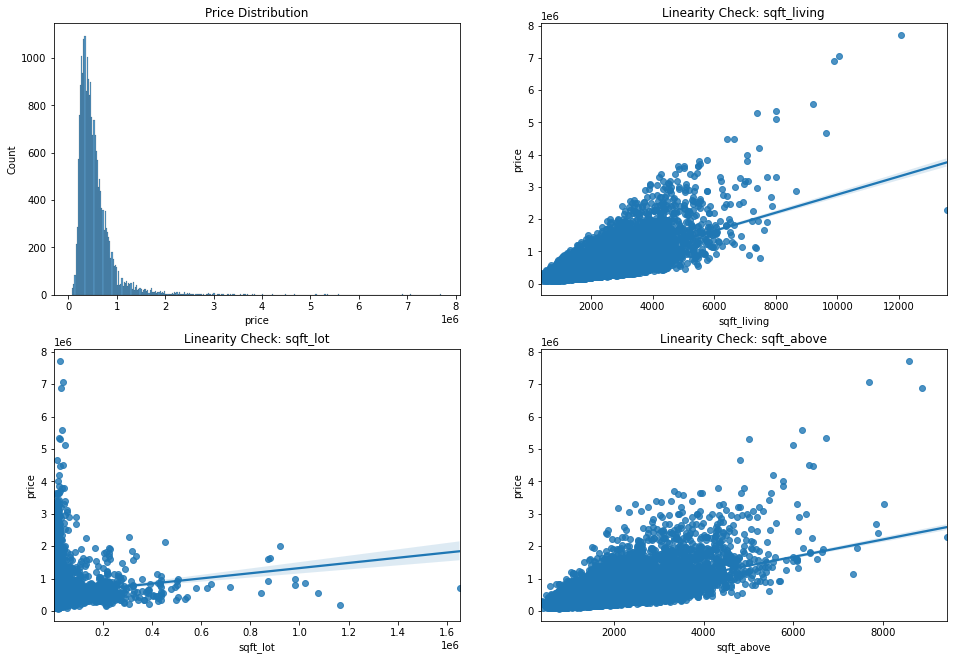

In [507]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

sns.histplot(df['price'], ax=axes[0][0]).set_title('Price Distribution')

# why a reg plot over a scatter plot?
for feat, ax in zip(cont, axes.flatten()[1:]): 
  sns.regplot(feat,'price', data=df, ax=ax).set_title(f'Linearity Check: {feat}')

fig.show()

## Pre-Modeling Multicollinearity Check

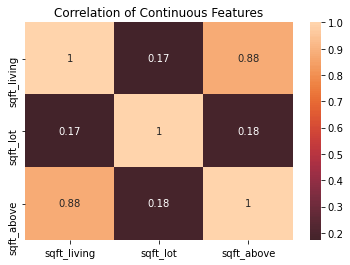

In [508]:
corr = df[cont].corr()
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous Features');

In [509]:
#abs(features.corr()) > 0.8

fig, axes = plt.subplots(figsize=(15,15))
for i in range(len(categorical)):
    col = categorical
    
    sns.boxplot(x=col, y='price', data=df, ax=ax)
    ax.set_title(col + ' box plot')
    fig.suptitle('Feature vs Price')
    fig.tight_layout()           

fig, axes = plt.subplots(figsize=(15,15),ncols=2,nrows=4)
for i in range(len(categorical)):
    col = categorical[i]
    y = i%2
    x = i//2
    ax = axes[x,y]
    
    sns.boxplot(x=col, y='price', data=df, ax=ax)
    ax.set_title(col + ' box plot')
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

## Modeling

### Train Test Split and Model Function

In [510]:
X = df.drop('price', axis=1)
y = df['price']
X.head()

,sqft_living,sqft_lot,sqft_above,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,1180,5650,1180,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2570,7242,2170,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,770,10000,770,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,1050,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1680,8080,1680,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [512]:
#Model function
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [513]:
model(X_train,X_test,y_train,y_test);

Train R2:  0.8432332061097745
Test R2:  0.8306109549914176
Train RMSE:  147424.4370277124
Test RMSE:  142715.07604069586


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     677.9
Date:                Mon, 27 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:21:49   Log-Likelihood:            -2.3012e+05
No. Observations:               17276   AIC:                         4.605e+05
Df Residuals:                   17139   BIC:                         4.616e+05
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.052e+04   1.76e+05      0.174      0.862   -3.14e+05    3.75e+05
sqft_living      129.9108      5.267     24.666      0.000     119.587     140.234
sqft_lot           0.1382      0.030      4.557      0.000       0.079       0.198
sqft_above        32.6234      5.846      5.580      0.000      21.164      44.083
bedrooms_2      1.246e+04   1.27e+04      0.981      0.327   -1.24e+04    3.74e+04
bedrooms_3      2.315e+04   1.27e+04      1.817      0.069   -1819.399    4.81e+04
bedrooms_4      9660.1791    1.3e+04      0.742      0.458   -1.59e+04    3.52e+04
bedrooms_5     -1408.2041   1.37e+04     -0.103      0.918   -2.83e+04    2.55e+04
bedrooms_6     -4.551e+04   1.67e+04     -2.728      0.006   -7.82e+04   -1.28e+04
bedrooms_7     -1.711e+05   3.14e+04     -5.446      0.000   -2.33e+05    -1.1e+05
bedrooms_8     -5.655e+04   4.58e+04     -1.236      0.217   -1.46e+05    3.31e+04
bedrooms_9      -1.55e+05   6.86e+04     -2.260      0.024   -2.89e+05   -2.05e+04
bedrooms_10    -4.873e+05   1.09e+05     -4.485      0.000      -7e+05   -2.74e+05
bedrooms_11    -6.764e+04   1.49e+05     -0.453      0.650    -3.6e+05    2.25e+05
bathrooms_075   1.189e+04   8.83e+04      0.135      0.893   -1.61e+05    1.85e+05
bathrooms_10    3.651e+04   8.57e+04      0.426      0.670   -1.31e+05    2.05e+05
bathrooms_125  -5.716e+04   1.01e+05     -0.569      0.570   -2.54e+05     1.4e+05
bathrooms_15    2.704e+04   8.58e+04      0.315      0.753   -1.41e+05    1.95e+05
bathrooms_175   2.579e+04   8.58e+04      0.301      0.764   -1.42e+05    1.94e+05
bathrooms_20    2.405e+04   8.58e+04      0.280      0.779   -1.44e+05    1.92e+05
bathrooms_225   4.286e+04   8.58e+04      0.500      0.617   -1.25e+05    2.11e+05
bathrooms_25    3.203e+04   8.58e+04      0.373      0.709   -1.36e+05       2e+05
bathrooms_275   3.134e+04   8.59e+04      0.365      0.715   -1.37e+05       2e+05
bathrooms_30      3.9e+04    8.6e+04      0.454      0.650   -1.29e+05    2.07e+05
bathrooms_325   9.226e+04   8.61e+04      1.072      0.284   -7.64e+04    2.61e+05
bathrooms_35    4.707e+04    8.6e+04      0.547      0.584   -1.22e+05    2.16e+05
bathrooms_375   1.333e+05   8.69e+04      1.534      0.125    -3.7e+04    3.04e+05
bathrooms_40     1.35e+05   8.71e+04      1.551      0.121   -3.57e+04    3.06e+05
bathrooms_425   1.692e+05    8.8e+04      1.923      0.054   -3262.674    3.42e+05
bathrooms_45    1.485e+05   8.75e+04      1.698      0.090   -2.29e+04     3.2e+05
bathrooms_475   3.495e+05   9.24e+04      3.784      0.000    1.68e+05    5.31e+05
bathrooms_50    2.597e+05    9.3e+04      2.794      0.005    7.75e+04    4.42e+05
bathrooms_525   3.774e+05   9.87e+04      3.824      0.000    1.84e+05    5.71e+05
bathrooms_55    5.254e+05   1.04e+05      5.051      0.000    3.22e+05    7.29e+05
bathrooms_57

### Remove Insignificant Features

In [546]:
high_p = ['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_8','bedrooms_11','bathrooms_075','bathrooms_10',
          'bathrooms_125','bathrooms_15','bathrooms_175','bathrooms_20','bathrooms_225','bathrooms_25','bathrooms_275',
          'bathrooms_30','bathrooms_325','bathrooms_35','bathrooms_375','bathrooms_45','bathrooms_575', 'bathrooms_65', 'bathrooms_675',
          'bathrooms_75','floors_15','floors_35','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10',
          'grade_11','zipcode_98002','zipcode_98003','zipcode_98022','zipcode_98030','zipcode_98031','zipcode_98032',
          'zipcode_98042','zipcode_98070','zipcode_98198','has_basement_1', 'condition_1', 'condition_2']

In [547]:
#Create new dataframe with significant p-values
sig_X = X.drop(high_p, axis=1)

In [548]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(sig_X,y,test_size=0.2, random_state=123)
model2 = model(x_train2,x_test2,y_train2,y_test2);

Train R2:  0.8224926520486999
Test R2:  0.8056293564369833
Train RMSE:  156873.86891321122
Test RMSE:  152877.13309315997


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     884.8
Date:                Mon, 27 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:32:28   Log-Likelihood:            -2.3119e+05
No. Observations:               17276   AIC:                         4.626e+05
Df Residuals:                   17185   BIC:                         4.633e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.447e+05   4916.989    -29.423      0.000   -1.54e+05   -1.35e+05
sqft_living     145.0190      3.089     46.940      0.000     138.963     151.075
sqft_lot          0.1876      0.031      6.026      0.000       0.127       0.249
sqft_above       84.4941      3.776     22.375      0.000      77.092      91.896
bedrooms_6    -8.551e+04   1.09e+04     -7.854      0.000   -1.07e+05   -6.42e+04
bedrooms_7    -1.991e+05   2.98e+04     -6.674      0.000   -2.58e+05   -1.41e+05
bedrooms_9    -2.557e+05   6.48e+04     -3.945      0.000   -3.83e+05   -1.29e+05
bedrooms_10    -5.53e+05   1.14e+05     -4.831      0.000   -7.77e+05   -3.29e+05
bathrooms_40   1.199e+05   1.54e+04      7.799      0.000    8.98e+04     1.5e+05
bathrooms_425  1.511e+05   2.03e+04      7.442      0.000    1.11e+05    1.91e+05
bathrooms_475  3.214e+05   3.59e+04      8.955      0.000    2.51e+05    3.92e+05
bathrooms_50   2.245e+05   3.77e+04      5.963      0.000    1.51e+05    2.98e+05
bathrooms_525  3.194e+05   5.15e+04      6.197      0.000    2.18e+05     4.2e+05
bathrooms_55   4.732e+05    6.2e+04      7.632      0.000    3.52e+05    5.95e+05
bathrooms_60   5.675e+05   6.66e+04      8.521      0.000    4.37e+05    6.98e+05
bathrooms_625  4.039e+05   1.15e+05      3.520      0.000    1.79e+05    6.29e+05
bathrooms_775  2.106e+06   1.68e+05     12.512      0.000    1.78e+06    2.44e+06
bathrooms_80   1.074e+06   1.17e+05      9.159      0.000    8.44e+05     1.3e+06
floors_20     -1.951e+04   3465.923     -5.628      0.000   -2.63e+04   -1.27e+04
floors_25      6.989e+04   1.43e+04      4.884      0.000    4.18e+04    9.79e+04
floors_30     -5.809e+04   7941.267     -7.315      0.000   -7.37e+04   -4.25e+04
waterfront_1     6.6e+05    1.8e+04     36.760      0.000    6.25e+05    6.95e+05
view_1         9.022e+04   6064.086     14.878      0.000    7.83e+04    1.02e+05
view_2         1.922e+05   8273.551     23.235      0.000    1.76e+05    2.08e+05
view_3         1.002e+05   1.02e+04      9.862      0.000    8.03e+04     1.2e+05
view_4         3.025e+05   1.23e+04     24.673      0.000    2.78e+05    3.26e+05
condition_3    1.831e+04   2996.576      6.109      0.000    1.24e+04    2.42e+04
condition_4    6.119e+04   4738.756     12.913      0.000    5.19e+04    7.05e+04
grade_12       5.142e+05   2.03e+04     25.295      0.000    4.74e+05    5.54e+05
grade_13       1.245e+06   5.23e+04     23.819      0.000    1.14e+06    1.35e+06
zipcode_98004  8.311e+05   1.06e+04     78.659      0.000     8.1e+05    8.52e+05
zipcode_98005  3.505e+05   1.41e+04     24.852      0.000    3.23e+05    3.78e+05
zipcode_98006  2.977e+05   8834.861     33.693      0.000     2.8e+05    3.15e+05
zipcode_98007  2.769e+05    1.5e+04     18.423      0.000    2.47e+05    3.06e+05
zipcode_98008  2.677e+05   1.08e+04     24.788   

### Assumptions Check

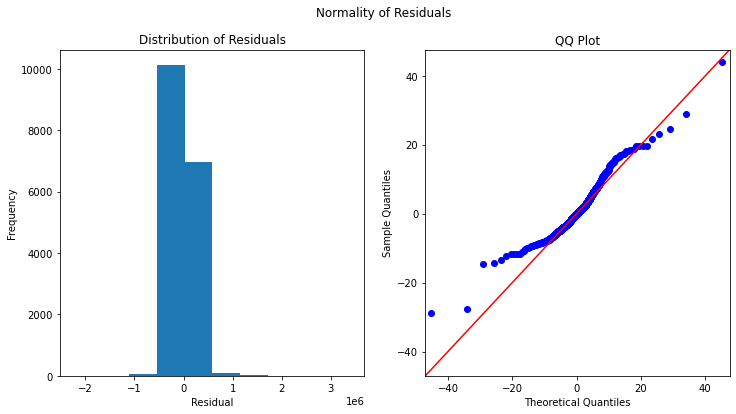

In [517]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

ax0.hist(model2.resid)
ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')

sm.qqplot(model2.resid, stats.t, fit=True, line="45", ax=ax1)
ax1.set(title='QQ Plot')

fig.suptitle('Normality of Residuals')

fig.show()

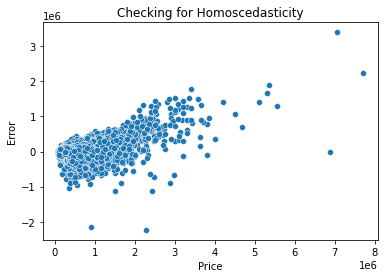

In [518]:
sns.scatterplot(y_train2, model2.resid)
plt.title('Checking for Homoscedasticity')
plt.xlabel('Price')
plt.ylabel('Error');


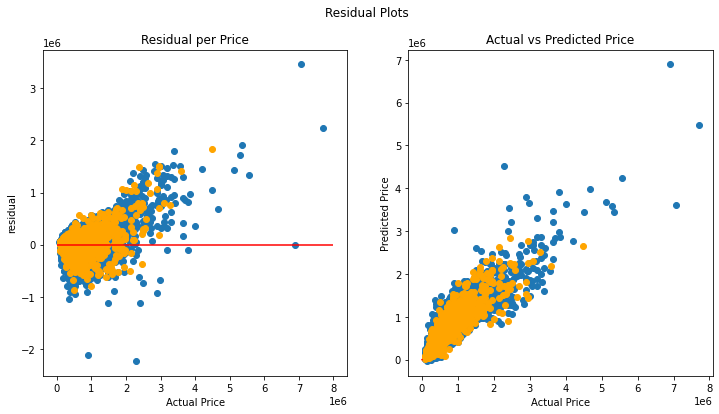

In [537]:
linreg = LinearRegression()
X_train2, X_test2, y_train2, y_test2 = train_test_split(sig_X, y, test_size=0.2, random_state=123)
linreg.fit(X_train2, y_train2)

y_hat_train = linreg.predict(X_train2)
y_hat_test = linreg.predict(X_test2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y_train2, y_train2-y_hat_train)
axes[0].scatter(y_test2, y_test2-y_hat_test, color='orange')
axes[0].set(xlabel='Actual Price', ylabel='residual', title='Residual per Price')
axes[0].hlines(0, xmin=5, xmax=8000000, colors='red')

axes[1].scatter(y_train2, y_hat_train)
axes[1].scatter(y_test2, y_hat_test, color='orange')
axes[1].plot([10, 45], [10, 45], color='red', linestyle='-')
axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
fig.show()

### Remove Outliers

In [575]:
def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [577]:
def model_outlier(X_train, X_test, y_train, y_test):
    # remove outliers 
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
   # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # display summary and return the model
    display(model.summary())
    return model

In [578]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(sig_X,y,test_size=0.2, random_state=123)
model3 = model_outlier(x_train3,x_test3,y_train3,y_test3);

Train R2:  0.8100218389939798
Test R2:  0.8075747884959754
Train RMSE:  90368.36394435106
Test RMSE:  91573.67424804103


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     805.8
Date:                Mon, 27 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:44:05   Log-Likelihood:            -2.0964e+05
No. Observations:               16339   AIC:                         4.195e+05
Df Residuals:                   16252   BIC:                         4.201e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.377e+04   3010.664    -11.218      0.000   -3.97e+04   -2.79e+04
sqft_living     105.0393      1.932     54.377      0.000     101.253     108.826
sqft_lot          0.3281      0.019     17.649      0.000       0.292       0.365
sqft_above       66.1921      2.373     27.889      0.000      61.540      70.844
bedrooms_6    -5.948e+04   6857.293     -8.673      0.000   -7.29e+04    -4.6e+04
bedrooms_7    -1.294e+05   1.92e+04     -6.749      0.000   -1.67e+05   -9.19e+04
bedrooms_9    -2.069e+05   4.56e+04     -4.542      0.000   -2.96e+05   -1.18e+05
bedrooms_10   -1.416e+05    9.1e+04     -1.557      0.120    -3.2e+05    3.67e+04
bathrooms_40   1.734e+04    1.2e+04      1.445      0.149   -6185.135    4.09e+04
bathrooms_425 -2.623e+04   1.92e+04     -1.364      0.173   -6.39e+04    1.15e+04
bathrooms_475 -8.333e+04   4.09e+04     -2.038      0.042   -1.63e+05   -3190.519
bathrooms_50  -6.867e+04   3.23e+04     -2.126      0.034   -1.32e+05   -5344.139
bathrooms_525 -8366.4082   5.26e+04     -0.159      0.874   -1.11e+05    9.47e+04
bathrooms_55   -1.17e+05   9.09e+04     -1.287      0.198   -2.95e+05    6.13e+04
bathrooms_60  -7.339e+05   1.05e+05     -6.966      0.000    -9.4e+05   -5.27e+05
bathrooms_625  2.977e-09   5.06e-10      5.883      0.000    1.99e-09    3.97e-09
bathrooms_775 -2.282e-10   3.54e-10     -0.644      0.520   -9.23e-10    4.66e-10
bathrooms_80   9.726e-10   2.47e-10      3.944      0.000    4.89e-10    1.46e-09
floors_20     -5203.8677   2085.197     -2.496      0.013   -9291.083   -1116.652
floors_25     -2.789e+04   9763.327     -2.857      0.004    -4.7e+04   -8751.804
floors_30     -4.116e+04   4737.634     -8.688      0.000   -5.04e+04   -3.19e+04
waterfront_1   1.545e+05    1.6e+04      9.683      0.000    1.23e+05    1.86e+05
view_1         7.574e+04   3788.759     19.990      0.000    6.83e+04    8.32e+04
view_2         1.146e+05   5678.356     20.187      0.000    1.03e+05    1.26e+05
view_3         7.648e+04   6455.412     11.847      0.000    6.38e+04    8.91e+04
view_4         1.818e+05   9216.682     19.725      0.000    1.64e+05       2e+05
condition_3    1.636e+04   1774.558      9.218      0.000    1.29e+04    1.98e+04
condition_4    4.734e+04   2853.342     16.591      0.000    4.17e+04    5.29e+04
grade_12       6.577e+04   5.29e+04      1.244      0.213   -3.78e+04    1.69e+05
grade_13      -1.044e-10   3.07e-10     -0.340      0.734   -7.07e-10    4.98e-10
zipcode_98004  5.418e+05   8559.047     63.299      0.000    5.25e+05    5.59e+05
zipcode_98005  3.637e+05   8520.197     42.692      0.000    3.47e+05     3.8e+05
zipcode_98006  3.013e+05   5511.718     54.658      0.000     2.9e+05    3.12e+05
zipcode_98007  2.689e+05   8805.614     30.535      0.000    2.52e+05    2.86e+05
zipcode_98008  2.469e+05   6393.747     38.621   

### Scale the model

In [573]:
#Model function
def scale_model(X_train, X_test, y_train, y_test):
    
    standardizer = StandardScaler()

    X_train_scaled = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)
    
    X_train_scaled['price'] = y_train.values
    X_test_scaled['price'] = y_test.values
    
    # statsmodels
    
    outcome = 'price'
    predictors = X_train_scaled.drop('price', axis=1)
    pred_sum = '+'.join(predictors.columns)
    formula = outcome + '~' + pred_sum
    model = ols(formula=formula, data=X_train_scaled).fit()
    
    # sklearn
    X_train_scaled = X_train_scaled.drop('price', axis=1)
    X_test_scaled = X_test_scaled.drop('price', axis=1)
    
    linreg = LinearRegression()
    linreg.fit(X_train_scaled, y_train)
    
    y_hat_train = linreg.predict(X_train_scaled)
    y_hat_test = linreg.predict(X_test_scaled)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train_scaled, y_train))
    print("Test R2: ", linreg.score(X_test_scaled, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [574]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(sig_X,y,test_size=0.2, random_state=123)
scaled_model = scale_model(x_train3,x_test3,y_train3,y_test3);

Train R2:  0.8224926520486999
Test R2:  0.8056293564375867
Train RMSE:  156873.8689132112
Test RMSE:  152877.13309292268


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     884.8
Date:                Mon, 27 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:26:55   Log-Likelihood:            -2.3119e+05
No. Observations:               17276   AIC:                         4.626e+05
Df Residuals:                   17185   BIC:                         4.633e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.405e+05   1196.674    451.686      0.000    5.38e+05    5.43e+05
sqft_living    1.338e+05   2850.017     46.940      0.000    1.28e+05    1.39e+05
sqft_lot       7760.5937   1287.921      6.026      0.000    5236.137    1.03e+04
sqft_above     7.021e+04   3138.076     22.375      0.000    6.41e+04    7.64e+04
bedrooms_6    -9673.4601   1231.597     -7.854      0.000   -1.21e+04   -7259.403
bedrooms_7    -8151.4945   1221.383     -6.674      0.000   -1.05e+04   -5757.459
bedrooms_9    -4764.7904   1207.821     -3.945      0.000   -7132.242   -2397.339
bedrooms_10   -5949.9269   1231.659     -4.831      0.000   -8364.104   -3535.750
bathrooms_40   9579.7614   1228.265      7.799      0.000    7172.237     1.2e+04
bathrooms_425  9106.9639   1223.736      7.442      0.000    6708.315    1.15e+04
bathrooms_475  1.093e+04   1220.427      8.955      0.000    8537.310    1.33e+04
bathrooms_50   7243.9349   1214.798      5.963      0.000    4862.808    9625.062
bathrooms_525  7682.9106   1239.709      6.197      0.000    5252.954    1.01e+04
bathrooms_55   9523.1910   1247.720      7.632      0.000    7077.533     1.2e+04
bathrooms_60   1.057e+04   1240.965      8.521      0.000    8142.121     1.3e+04
bathrooms_625  4345.2037   1234.451      3.520      0.000    1925.554    6764.854
bathrooms_775  1.602e+04   1280.727     12.512      0.000    1.35e+04    1.85e+04
bathrooms_80   1.155e+04   1261.230      9.159      0.000    9079.126     1.4e+04
floors_20     -9468.3332   1682.467     -5.628      0.000   -1.28e+04   -6170.527
floors_25      6131.7665   1255.409      4.884      0.000    3671.038    8592.495
floors_30     -9672.1015   1322.223     -7.315      0.000   -1.23e+04   -7080.409
waterfront_1   5.367e+04   1459.924     36.760      0.000    5.08e+04    5.65e+04
view_1         1.844e+04   1239.692     14.878      0.000     1.6e+04    2.09e+04
view_2         2.884e+04   1241.226     23.235      0.000    2.64e+04    3.13e+04
view_3         1.204e+04   1220.660      9.862      0.000    9645.509    1.44e+04
view_4         3.689e+04   1495.280     24.673      0.000     3.4e+04    3.98e+04
condition_3    8053.3191   1318.196      6.109      0.000    5469.521    1.06e+04
condition_4    1.646e+04   1274.879     12.913      0.000     1.4e+04     1.9e+04
grade_12       3.289e+04   1300.402     25.295      0.000    3.03e+04    3.54e+04
grade_13       3.281e+04   1377.290     23.819      0.000    3.01e+04    3.55e+04
zipcode_98004  1.008e+05   1281.581     78.659      0.000    9.83e+04    1.03e+05
zipcode_98005  3.075e+04   1237.303     24.852      0.000    2.83e+04    3.32e+04
zipcode_98006  4.433e+04   1315.640     33.693      0.000    4.17e+04    4.69e+04
zipcode_98007  2.261e+04   1227.293     18.423      0.000    2.02e+04     2.5e+04
zipcode_98008   3.12e+04   1258.822     24.788   

### Log Transformation

In [524]:
log_df = df.copy()
log_df['log_price'] = log_df['price'].copy()
log_df['log_price'] = log_df['log_price'].map(lambda x: np.log(x))

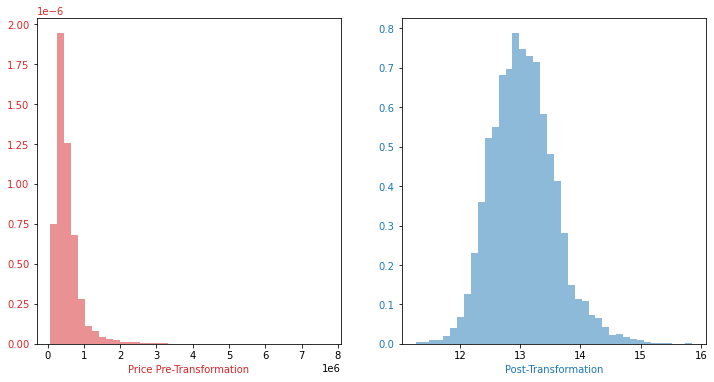

In [525]:
#Visualize change in distribution from log transformation

newfig = plt.figure(num=2, figsize = (12,6))
ax_pre = newfig.add_subplot(1,2,1)
ax_post = newfig.add_subplot(1,2,2)
    
color = 'tab:red'
ax_pre.set_xlabel(('Price Pre-Transformation'),  color=color)
ax_pre.hist(log_df['price'], bins=40, density = True, alpha = 0.5, color=color)
ax_pre.tick_params(axis='y', labelcolor=color)
    
color2 = 'tab:blue'
ax_post.set_xlabel(('Post-Transformation'), color=color2)
ax_post.hist(log_df['log_price'], bins=40, density = True,  alpha = 0.5, color=color2)
ax_post.tick_params(axis='y', labelcolor=color2)

plt.show()

In [526]:
log_df = log_df.drop('price', axis=1)
log_df.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8',
       ...
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199', 'has_basement_1',
       'renovated_1', 'log_price'],
      dtype='object', length=137)

### Update Modeling Function for Log Transformation

In [527]:
# Model function to reverse log transform for metrics
def model_log(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['log_price'] = y_train
    
    formula = 'log_price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_log = linreg.predict(X_train)
    y_hat_test_log = linreg.predict(X_test)

    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model


In [528]:
log_X = log_df.drop('log_price', axis=1)
log_y = log_df['log_price']
log_X.head()

,sqft_living,sqft_lot,sqft_above,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,1180,5650,1180,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2570,7242,2170,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,770,10000,770,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,1050,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1680,8080,1680,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [529]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(log_X,log_y,test_size=0.2,random_state=123)
model3 = model_log(x_train3,x_test3,y_train3,y_test3);

Train R2:  0.8789101722825219
Test R2:  0.8757323724383518
Train RMSE:  137833.72322644945
Test RMSE:  129092.39331823944


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     914.7
Date:                Mon, 27 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:21:53   Log-Likelihood:                 4770.8
No. Observations:               17276   AIC:                            -9268.
Df Residuals:                   17139   BIC:                            -8205.
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.7865      0.219     53.901      0.000      11.358      12.215
sqft_living        0.0001   6.56e-06     20.808      0.000       0.000       0.000
sqft_lot         6.69e-07   3.78e-08     17.719      0.000    5.95e-07    7.43e-07
sqft_above         0.0001   7.28e-06     16.585      0.000       0.000       0.000
bedrooms_2         0.0411      0.016      2.601      0.009       0.010       0.072
bedrooms_3         0.0587      0.016      3.697      0.000       0.028       0.090
bedrooms_4         0.0607      0.016      3.745      0.000       0.029       0.093
bedrooms_5         0.0326      0.017      1.909      0.056      -0.001       0.066
bedrooms_6        -0.0082      0.021     -0.395      0.693      -0.049       0.033
bedrooms_7        -0.1063      0.039     -2.717      0.007      -0.183      -0.030
bedrooms_8        -0.0755      0.057     -1.325      0.185      -0.187       0.036
bedrooms_9        -0.0150      0.085     -0.175      0.861      -0.182       0.152
bedrooms_10       -0.2644      0.135     -1.954      0.051      -0.530       0.001
bedrooms_11        0.1297      0.186      0.698      0.485      -0.234       0.494
bathrooms_075      0.2449      0.110      2.227      0.026       0.029       0.460
bathrooms_10       0.2310      0.107      2.165      0.030       0.022       0.440
bathrooms_125      0.1725      0.125      1.378      0.168      -0.073       0.418
bathrooms_15       0.2380      0.107      2.227      0.026       0.029       0.447
bathrooms_175      0.2779      0.107      2.603      0.009       0.069       0.487
bathrooms_20       0.2720      0.107      2.546      0.011       0.063       0.481
bathrooms_225      0.2989      0.107      2.798      0.005       0.090       0.508
bathrooms_25       0.3083      0.107      2.887      0.004       0.099       0.518
bathrooms_275      0.3130      0.107      2.927      0.003       0.103       0.523
bathrooms_30       0.3003      0.107      2.806      0.005       0.091       0.510
bathrooms_325      0.3165      0.107      2.953      0.003       0.106       0.527
bathrooms_35       0.3085      0.107      2.880      0.004       0.099       0.518
bathrooms_375      0.3266      0.108      3.018      0.003       0.114       0.539
bathrooms_40       0.3096      0.108      2.856      0.004       0.097       0.522
bathrooms_425      0.2861      0.110      2.611      0.009       0.071       0.501
bathrooms_45       0.2506      0.109      2.301      0.021       0.037       0.464
bathrooms_475      0.2858      0.115      2.485      0.013       0.060       0.511
bathrooms_50       0.3117      0.116      2.692      0.007       0.085       0.539
bathrooms_525      0.2802      0.123      2.280      0.023       0.039       0.521
bathrooms_55       0.2164      0.130      1.671      0.095      -0.037       0.470
bathrooms_57

In [530]:
log_high_p = ['bedrooms_20','bedrooms_50','bedrooms_60','bedrooms_80','bedrooms_90','bedrooms_100','bedrooms_110',
              'bathrooms_075','bathrooms_10','bathrooms_125','bathrooms_15','bathrooms_175','bathrooms_20','bathrooms_225',
              'bathrooms_25','bathrooms_275','bathrooms_30','bathrooms_325','bathrooms_35','bathrooms_375','bathrooms_40',
              'bathrooms_425','bathrooms_45','bathrooms_475','bathrooms_50','bathrooms_525','bathrooms_55','bathrooms_575',
              'bathrooms_60','bathrooms_625','bathrooms_65','bathrooms_75','bathrooms_80','floors_15','floors_20',
              'floors_25','floors_35','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13','zipcode_98002',
              'zipcode_98003','zipcode_98023','zipcode_98022','zipcode_98032','zipcode_98092']

In [531]:
sig_log_X = log_X.drop(log_high_p, axis=1)

KeyError: "['bedrooms_20' 'bedrooms_50' 'bedrooms_60' 'bedrooms_80' 'bedrooms_90'\n 'bedrooms_100' 'bedrooms_110'] not found in axis"

In [ ]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(sig_log_X,log_y,test_size=0.2,random_state=123)
model4 = model_log(x_train4,x_test4,y_train4,y_test4);

### Scale the data

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = log_df.apply(normalize)

features_final.head()

def standardize(X_train, X_test):
    
    standardizer = StandardScaler()

    standardizer.fit(X_train)

    X_train_scaled = standardizer.transform(X_train)
    X_test_scaled = standardizer.transform(X_test)
    return(X_train_scaled, X_test_scaled)

X_train_scaled, X_test_scaled = standardize(x_train4, x_test4)

In [ ]:
# culling insignificant features
x_train5, x_test5, y_train5, y_test5 = train_test_split(sig_log_X,log_y,test_size=0.2,random_state=123)

X_train = x_train5
X_test = x_test5

standardizer = StandardScaler()

x_train_scaled = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)


In [ ]:
x_train_scaled.tail()

In [ ]:
scaled_model = model_log(x_train_scaled,x_test_scaled,y_train5,y_test5);

In [ ]:
print(len(y_test))

In [ ]:
print(len(x_train_scaled))

In [ ]:
print(len(x_test_scaled))

Exploring PSF

In [ ]:
psf_df = df.copy()

In [ ]:
psf_df['psf'] = psf_df['price'] / psf_df['sqft_above']
psf_df.head()

In [ ]:
plt.hist(psf_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency')